# Preamble

These are not "real" model solutions. For more information on solutions in general you should see the model solutions in ```R```. 

This is mostly just something to help me remeber how this stuff goes and to learn how things work in python.

As such, the explanations are lacking and the code is not written to be particularily easy to understand.

However as there is express intrest in seeing how the exercises can be done in python, here they are.

In [18]:
from itertools import product
import random
from functools import reduce
from collections import defaultdict

from IPython.display import display, Markdown, Latex
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Scatter, Layout, Figure, Surface

init_notebook_mode(connected=True)

# Problem 1

### (a) 

Consider a binary classification problem with $Y \in \{−1, +1\}$ and two real-valued features, $X_1, X_2 \in \mathbb{R}$.  Suppose that we have learned a (Gaussian) naive Bayes classifier and obtained parameter estimates $\hat{\mu}_{-, j} = 0$, $\hat{\sigma}^2_{−,j} = 1$ and $\hat{\mu}_{+,j} = 0$, $\hat{\sigma}^2_{+,j} = 16$ for $j \in \{1, 2\}$. Further, we use a uniform class prior $\hat{p}(y) = 1/2$ for $y \in \{−1, +1\}$.

Use the Bayes formula to compute the posterior probability
$$
P(Y = +1 \mid X_1 = 1, X_2 = 2)
$$

Poking at the given probability untill we can calculate the solution:

$$
P(Y = +1 \mid X_1 = 1, X_2 = 2) = \frac{P(\mathbf{x} \mid Y = +1)\cdot P(Y = +1)}{P(\mathbf{x}\mid Y = +1) + P(\mathbf{x}\mid Y = -1)} \\
= \frac{
\mathcal{N}(X_1\mid \mu_{+,1}, \sigma^2_{+,1})\cdot\mathcal{N}(X_2\mid \mu_{+,2}, \sigma^2_{+,2})\cdot P(Y = +1)
}{
\mathcal{N}(X_1\mid \mu_{+,1}, \sigma^2_{+,1})\cdot\mathcal{N}(X_2\mid \mu_{+,2}, \sigma^2_{+,2})\cdot P(Y = +1) + \mathcal{N}(X_1\mid \mu_{-,1}, \sigma^2_{-,1})\cdot\mathcal{N}(X_2\mid \mu_{-,2}, \sigma^2_{-,2})\cdot P(Y = -1)}\\
= \frac{
\frac{1}{\sqrt{2\pi\sigma^2_{+,1}}}\exp\left(-\frac{(X_1 - \mu_{+,1})^2}{2\sigma^2_{+,1}}\right)\cdot \frac{1}{\sqrt{2\pi\sigma^2_{+,2}}}\exp\left(-\frac{(X_2 - \mu_{+,2})^2}{2\sigma^2_{+,2}}\right)
}{
\frac{1}{\sqrt{2\pi\sigma^2_{+,1}}}\exp\left(-\frac{(X_1 - \mu_{+,1})^2}{2\sigma^2_{+,1}}\right)\cdot \frac{1}{\sqrt{2\pi\sigma^2_{+,2}}}\exp\left(-\frac{(X_2 - \mu_{+,2})^2}{2\sigma^2_{+,2}}\right)+
\frac{1}{\sqrt{2\pi\sigma^2_{-,1}}}\exp\left(-\frac{(X_1 - \mu_{-,1})^2}{2\sigma^2_{-,1}}\right)\cdot \frac{1}{\sqrt{2\pi\sigma^2_{-,2}}}\exp\left(-\frac{(X_2 - \mu_{-,2})^2}{2\sigma^2_{-,2}}\right)
}\\
= \frac{
\frac{1}{\sigma_{+,1}}\exp\left(-\frac{(X_1 - \mu_{+,1})^2}{2\sigma^2_{+,1}}\right)\cdot \frac{1}{\sigma_{+,2}}\exp\left(-\frac{(X_2 - \mu_{+,2})^2}{2\sigma^2_{+,2}}\right)
}{
\frac{1}{\sigma_{+,1}}\exp\left(-\frac{(X_1 - \mu_{+,1})^2}{2\sigma^2_{+,1}}\right)\cdot \frac{1}{\sigma_{+,2}}\exp\left(-\frac{(X_2 - \mu_{+,2})^2}{2\sigma^2_{+,2}}\right)+
\frac{1}{\sigma_{-,1}}\exp\left(-\frac{(X_1 - \mu_{-,1})^2}{2\sigma^2_{-,1}}\right)\cdot \frac{1}{\sigma_{-,2}}\exp\left(-\frac{(X_2 - \mu_{-,2})^2}{2\sigma^2_{-,2}}\right)
}\\
= \frac{
\frac{1}{4}\exp\left(-\frac{1}{32}\right)\cdot \frac{1}{4}\exp\left(-\frac{2^2}{32}\right)
}{
\frac{1}{4}\exp\left(-\frac{1}{32}\right)\cdot \frac{1}{4}\exp\left(-\frac{2^2}{32}\right)+
\frac{1}{1}\exp\left(-\frac{1}{2}\right)\cdot \frac{1}{1}\exp\left(-\frac{2^2}{2}\right)
}
= \frac{\exp(-5/32)}{\exp(-5/32) + 16\exp(-5/2)}
$$

In [2]:
np.exp(-5/32)/(np.exp(-5/32) + 16 * np.exp(-5/2))

0.39440366804152904

### (b)

Visualize the class posterior $P(Y = +1 \mid x)$, where $x = (x_1, x_2)$ contains the observed feature values on a suitable grid of points.

Let's quickly take a look at our class distributions first:

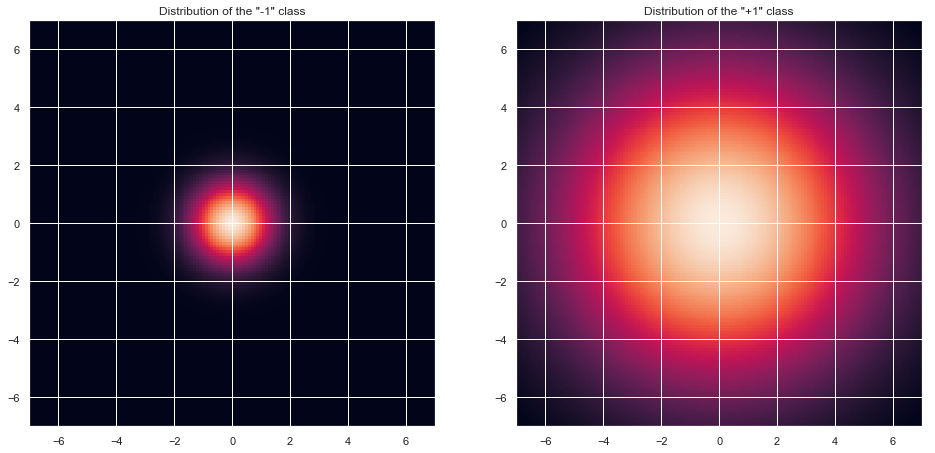

In [3]:
x, y = np.mgrid[-7:7.1:0.1, 7:-7.1:-0.1]
quants = np.asarray(list(zip(x.ravel(), y.ravel())))

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
var = multivariate_normal(mean=0, cov=1)
pdn = np.prod(np.asarray([var.pdf(t) for t in quants]), axis=1).reshape(x.shape)
plt.title('Distribution of the "-1" class')
plt.imshow(pdn, extent=(-7, 7, -7, 7))

plt.subplot(1, 2, 2)
var = multivariate_normal(mean=0, cov=16)
pdp = np.prod(np.asarray([var.pdf(t) for t in quants]), axis=1).reshape(x.shape)
plt.title('Distribution of the "+1" class')
plt.imshow(pdp, extent=(-7, 7, -7, 7))

plt.show()

We note that (as expected from the variance,) the distribution of $-1$ is significantly tighter than that of $+1$.

That is intuitively, the inclusion into class $+1$ as opposed to $-1$ is more likely the farther away we get from the origin.

And this is what we plot next.

In [4]:
data = [Surface(
    x=x,
    y=y,
    z=pdp / (pdp + pdn),
    colorscale="Reds")]
layout = Layout(
    autosize=False,
    width=900,
    height=900,
    title="P(Y = +1 | x)"
)
fig = Figure(data=data, layout=layout)
iplot(fig)

### (c)

Show that the above naive Bayes classifier is actually a special case of QDA.

### (d)

What is the number of free parameters that are needed to specify a (Gaussian) naive Bayes classifier for $p$ features?

What is the number of free parameters that are needed to specify a QDA classifier?

Which model is more complex?  What do you think this will mean in terms of overfitting and the number of
training data points required to achieve the asymptotic error (recall the Ng & Jordan paper from Exercise
2.3) of each classifier?

# Problem 2

Assume that we have a situation where the class variable $Y$ can take three values $\{0,1,2\}$, and that there are two feature variables $X_1 \in \{0,1\}$ and $X_2 \in \{0,1,2\}$. The true distribution from which the data is sampled is such that the class distribution $P(Y)$ is given by $P(Y = 0) = 0.4$, $P(Y = 1) = 0.3$ and $P(Y = 2) = 0.3$, and class-conditional distributions $P(X \mid Y)$ are as specified below (with $X = (X_1,X_2)$):

<div style="float: left; min-width:30%">
<table>
  <tr style="background-color: white">
    <td style="min-width:3em" colspan="2" rowspan="2"></td>
    <td style="min-width:3em" colspan="2">$X_1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$0$</td>
    <td style="min-width:3em">$1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em" rowspan="3">$X_2$<br></td>
    <td style="min-width:3em">$0$</td>
    <td style="border: 1px solid black; min-width:3em">$0.2$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.4$</td>
    <td style="border: 1px solid black;min-width:3em">$0.2$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$2$</td>
    <td style="border: 1px solid black;min-width:3em">$0.0$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
  </tr>
  <caption style="color: black">$P(X_1,X_2 \mid Y = 0)$</caption>
</table>
</div>
<div style="float: left; min-width:30%">
<table>
  <tr style="background-color: white">
    <td style="min-width:3em" colspan="2" rowspan="2"></td>
    <td style="min-width:3em" colspan="2">$X_1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$0$</td>
    <td style="min-width:3em">$1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em" rowspan="3">$X_2$<br></td>
    <td style="min-width:3em">$0$</td>
    <td style="border: 1px solid black; min-width:3em">$0.6$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$2$</td>
    <td style="border: 1px solid black;min-width:3em">$0.1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.0$</td>
  </tr>
  <caption style="color: black">$P(X_1,X_2 \mid Y = 1)$</caption>
</table>
</div>
<div style="float: left; min-width:30%">
<table>
  <tr style="background-color: white">
    <td style="min-width:3em" colspan="2" rowspan="2"></td>
    <td style="min-width:3em" colspan="2">$X_1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$0$</td>
    <td style="min-width:3em">$1$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em" rowspan="3">$X_2$<br></td>
    <td style="min-width:3em">$0$</td>
    <td style="border: 1px solid black; min-width:3em">$0.1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.4$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$1$</td>
    <td style="border: 1px solid black;min-width:3em">$0.3$</td>
    <td style="border: 1px solid black;min-width:3em">$0.0$</td>
  </tr>
  <tr style="background-color: white">
    <td style="min-width:3em">$2$</td>
    <td style="border: 1px solid black;min-width:3em">$0.2$</td>
    <td style="border: 1px solid black;min-width:3em">$0.0$</td>
  </tr>
  <caption style="color: black">$P(X_1,X_2 \mid Y = 2)$</caption>
</table>
</div>

### (a)

Let’s draw some training data from the above source. First draw a single class value from $P(Y)$

Now we can draw the feature values from their joint distribution.

Draw a training data set of $n = 100$ points using this procedure. Check that you get roughly 40 cases with $Y = 0$, and roughly 29 cases of $X = (0,0)$.  (Can you see why the latter should be the case?)

Single class value (with seed chosen to get 1 by chance...):

In [5]:
np.random.seed(1)
np.random.choice([0, 1, 2], p=[0.4, 0.3, 0.3])

1

Single $X_1$ and $X_2$ values for the sample (with seed set to get (0, 0) by chanse...)

In [6]:
np.random.seed(1337)
r = np.random.random_sample()
if r >=0.7:
    if r >= 0.9:
        print("X1: 0, X2: 2")
    else:
        print("X1: 1, X2: 1" if r >= 0.8 else "X1: 0, X2: 1")
else:
    print("X1: 1, X2: 0" if r >= 0.6 else "X1: 0, X2: 0")

X1: 0, X2: 0


Now to do something less silly to get usable data.

In [7]:
np.random.seed(sum([ord(c) for c in "One!"]))
y = np.random.choice([0, 1, 2], size=100, replace=True, p=[0.4, 0.3, 0.3])
variable_combinations = list(product([0, 1], [0, 1, 2]))
x_probs = [[0.2, 0.4, 0.0, 0.1, 0.2, 0.1], 
           [0.6, 0.1, 0.1, 0.1, 0.1, 0.0], 
           [0.1, 0.3, 0.2, 0.4, 0.0, 0.0]]
x = np.asarray([variable_combinations[np.random.choice(len(variable_combinations), p=x_probs[yv])] for yv in y])

In [8]:
sum(y == 0)

42

$42 \approx 40$. So we are good i think.

In [9]:
sum(np.sum(x, axis=1) == 0)

28

$28$ is very close to 29.

The reason for the expected value of $29$ is that 
$$
100 \cdot (P(Y = 0) \cdot P(x = (0, 0) \mid y = 0) + P(Y = 1) \cdot P(x = (0, 0) \mid y = 1) + P(Y = 2) \cdot P(x = (0, 0) \mid y = 2)) \\
= 100 \cdot (0.4 \cdot 0.2 + 0.3 \cdot 0.6 + 0.3 \cdot 0.1) = 29\mathrm{.}
$$

In [10]:
100 * (0.4 * 0.2 + 0.3 * 0.6 + 0.3 * 0.1)

29.000000000000004

### (b)

Use the formula on p. 11 of the lecture slides (Lecture 5) to obtain smoothed estimates of the class conditional distributions $\hat{P}(X_i \mid Y = c)$ for each feature $i \in \{1,2\}$ and each class $c \in \{0,1,2\}$. Try different smoothing parameters (maximum likelihood, Laplace, Krichesky-Trofimov). Also, apply the same kind of smoothing to estimate the class distribution as follows

$$
\hat{P}(Y = c) = \frac{n_c + \alpha}{n + 3\alpha}
$$

where $n_c$ is the number of training instances of class $c$, and $\alpha \in \{0,1,1/2\}$.


Creating a model class for naive bayes. Note that the idea was to quickly write something that works... Not something that is pretty or particularily efficient.

The class stucture follow what is used in sklearn models:
* The model constructor takes modelling parameters and returns a model.
* The fit method of the model is used to train the model. (This also returns the model.)
* The predict method is used to create predictins.

In [11]:
class NB:
    @staticmethod
    def class_counter(c, x):
        c[x] += 1
        return c
    
    def __init__(self, smoothing=0):
        self.a = smoothing
        
    def fit(self, data, labels):
        self.n = len(labels)
        self.class_exemplars = reduce(self.class_counter, labels, defaultdict(int))
        self.class_probabilities = {k: (c + self.a)/
                                        (self.n + len(self.class_exemplars) * self.a) 
                                        for k, c in self.class_exemplars.items()}
        self.classes = set(labels)
        self.conditionals = {v: self.conditional_probs(v, data, labels) for v in self.class_exemplars.keys()}
        return self
    
    def predict(self, data):
        return np.asarray([self._predict_pair(xv) for xv in data])
    
    def _predict_pair(self, xv):
        prediction = None
        prob = 0
        for c in self.classes:
            nprob = np.prod([self.conditionals[c][i][v] for i, v in enumerate(xv)]) * self.class_probabilities[c]
            if nprob > prob:
                prob = nprob
                prediction = c
        return prediction
    
    def conditional_probs(self, v, data, labels):
        x_vars = {}
        for i in range(len(data[0])):
            probs = reduce(self.class_counter, [xv[i] for xv, yv in zip(data, labels) if yv == v], defaultdict(int))
            v_sum = sum(probs.values())
            probs = defaultdict(int, {k: (v + self.a)/(v_sum + len(probs) * self.a) for k, v in probs.items()})
            x_vars[i] = probs
        return x_vars

And now to calculate the smoothed (or not) estimated class distributions.

In [12]:
output = "$\\alpha$ \\ class | $0$ | $1$ | $2$\n-|-|-|-\n"
for alpha in [0, 1, 0.5]:
    output += "${}$|{}\n".format(alpha,
                              "|".join("${:.4f}$".format(p) for p in NB(alpha).fit(x, y).class_probabilities.values()))
display(Markdown(output))

$\alpha$ \ class | $0$ | $1$ | $2$
-|-|-|-
$0$|$0.4200$|$0.2900$|$0.2900$
$1$|$0.4175$|$0.2913$|$0.2913$
$0.5$|$0.4187$|$0.2906$|$0.2906$


Now for $\hat{P}(X_i \mid Y = c)$ for all $\alpha, i, c$.

In [13]:
output = ""
for alpha in [0, 1, 0.5]:
    model = NB(alpha).fit(x, y)
    output += "\n#### $\\alpha = {}$\n".format(alpha)
    output += "\nclass \\ $X_1$ | 0 | 1\n"
    output += "-|-|-\n"
    output += "0 | {:.4f} | {:.4f}\n".format(model.conditionals[0][0][0], model.conditionals[0][0][1])
    output += "1 | {:.4f} | {:.4f}\n".format(model.conditionals[1][0][0], model.conditionals[1][0][1])
    output += "2 | {:.4f} | {:.4f}\n".format(model.conditionals[2][0][0], model.conditionals[2][0][1])
    
    output += "\nclass \\ $X_2$ | 0 | 1 | 2\n"
    output += "-|-|-\n"
    output += "0 | {:.4f} | {:.4f} | {:.4f}\n".format(model.conditionals[0][1][0], 
                                                      model.conditionals[0][1][1],
                                                      model.conditionals[0][1][2])
    output += "1 | {:.4f} | {:.4f} | {:.4f}\n".format(model.conditionals[1][1][0], 
                                                      model.conditionals[1][1][1],
                                                      model.conditionals[1][1][2])
    output += "2 | {:.4f} | {:.4f} | {:.4f}\n".format(model.conditionals[2][1][0], 
                                                      model.conditionals[2][1][1],
                                                      model.conditionals[2][1][2])
display(Markdown(output))


#### $\alpha = 0$

class \ $X_1$ | 0 | 1
-|-|-
0 | 0.5952 | 0.4048
1 | 0.8276 | 0.1724
2 | 0.6897 | 0.3103

class \ $X_2$ | 0 | 1 | 2
-|-|-
0 | 0.3333 | 0.5952 | 0.0714
1 | 0.7931 | 0.1034 | 0.1034
2 | 0.3103 | 0.4483 | 0.2414

#### $\alpha = 1$

class \ $X_1$ | 0 | 1
-|-|-
0 | 0.5909 | 0.4091
1 | 0.8065 | 0.1935
2 | 0.6774 | 0.3226

class \ $X_2$ | 0 | 1 | 2
-|-|-
0 | 0.3333 | 0.5778 | 0.0889
1 | 0.7500 | 0.1250 | 0.1250
2 | 0.3125 | 0.4375 | 0.2500

#### $\alpha = 0.5$

class \ $X_1$ | 0 | 1
-|-|-
0 | 0.5930 | 0.4070
1 | 0.8167 | 0.1833
2 | 0.6833 | 0.3167

class \ $X_2$ | 0 | 1 | 2
-|-|-
0 | 0.3333 | 0.5862 | 0.0805
1 | 0.7705 | 0.1148 | 0.1148
2 | 0.3115 | 0.4426 | 0.2459


### (c)

Now generate a test set of $10000$ points from the same source as the training set and apply the naive Bayes classifier you learned from the training data. What is the test set error you obtain? (The test set error with Laplace smoothing should be between 0.4–0.6.) 

Repeat with training sets of size $n = 25, 50, 100, 200, 400, 800, 1600, 3200, 6400$ and plot the test set error as a function of the training set size.  (The asymptotic error is 0.4.)  Does the smoothing method have an effect on the error?

Test and train data is generated in the same way as the 100 original samples were. Typically (IRL) the test set would be partitioned off from the training set but since we can create as much data as we want, I generated separate sets for test and train.

In [14]:
np.random.seed(np.prod([ord(c) for c in "asd"]))
y_test = np.random.choice([0, 1, 2], size=10000, replace=True, p=[0.4, 0.3, 0.3])
x_test = np.asarray([variable_combinations[np.random.choice(len(variable_combinations), p=x_probs[yv])] for yv in y_test])
np.random.seed(np.prod([ord(c) for c in "fuu"]))
y_train = np.random.choice([0, 1, 2], size=6400, replace=True, p=[0.4, 0.3, 0.3])
x_train = np.asarray([variable_combinations[np.random.choice(len(variable_combinations), p=x_probs[yv])] for yv in y_train])

Test with $\alpha = 1$

In [15]:
model = NB(0).fit(x, y)
1 - sum(y_test == model.predict(x_test))/len(y_test)

0.4788

$0.4 \leq 0.45 \leq 0.6$ as expected.

Now to calculate prediction errors for all the given data set sizes, given values of alpha and logistic regression.

In [16]:
sample_sizes = [25 * 2**i for i in range(9)]
error_rates_ml = []
error_rates_lap = []
error_rates_kt = []
log_err = []
for ss in sample_sizes:
    train_labels = y_train[:ss]
    train_data = x_train[:ss]
    error_rates_ml.append(1 - sum(y_test == NB().fit(train_data, train_labels).predict(x_test))/len(y_test))
    error_rates_lap.append(1 - sum(y_test == NB(1).fit(train_data, train_labels).predict(x_test))/len(y_test))
    error_rates_kt.append(1 - sum(y_test == NB(0.5).fit(train_data, train_labels).predict(x_test))/len(y_test))
    log_err.append(1 - sum(y_test == LogisticRegression(penalty="l1", C=np.iinfo(np.int32).max).
                                       fit(OneHotEncoder().fit_transform(train_data), 
                                           train_labels).predict(OneHotEncoder().fit_transform(x_test)))/len(y_test))

The logistic regression was annoying to set up as a data conversion from essentially "categorical" to a one-hot sparce matrix was required, as well as a hack to "disable" regularization in the model.

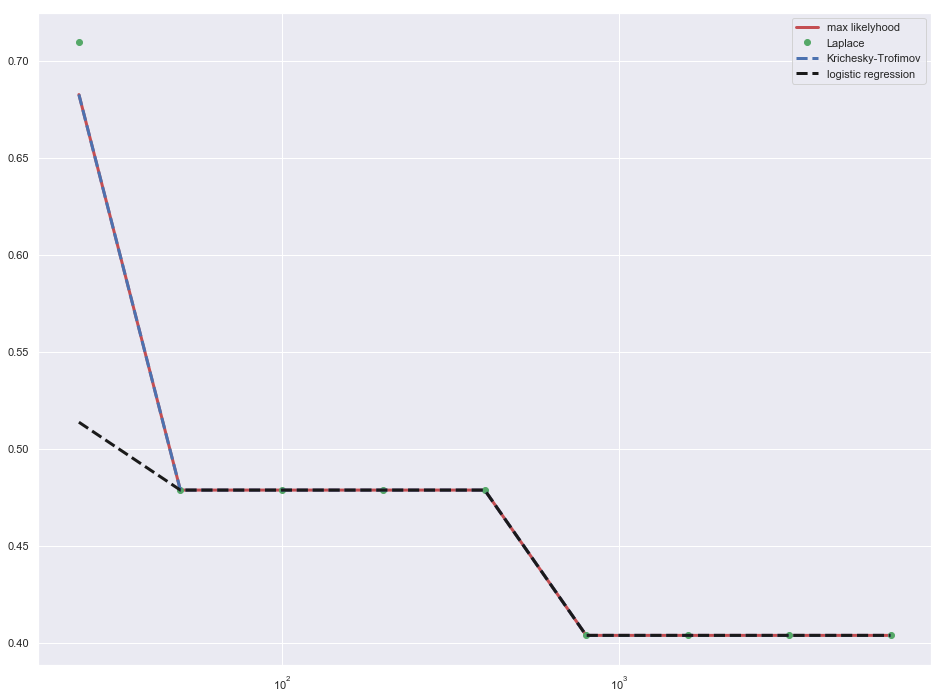

In [17]:
plt.figure(figsize=(16, 12))
plt.plot(sample_sizes, error_rates_ml, 'r', label="max likelyhood", linewidth=3)
plt.plot(sample_sizes, error_rates_lap, 'go', label="Laplace", linewidth=3)
plt.plot(sample_sizes, error_rates_kt, 'b--', label="Krichesky-Trofimov", linewidth=3)
plt.plot(sample_sizes, log_err, 'k--', label="logistic regression", linewidth=3)
plt.gca().set_xscale("log")
plt.legend(loc="upper right")
plt.show()

From the plot we can see that all of our models behave very similarily, with the only difference being for the lowest traing set size of 25, where logistic regression did better and nb with Laplace smoothing did worse than the other models. This changes if the experiment is done with different seeds. 

With all the seeds I tried, all the models reached the 0.4 bound (or came very close).

### (d)

Apply logistic regression to the same data and compare the results to those of the naive Bayes classifier. Analyse and try to explain the results. You may ask whether the assumption underlying the naive Bayes classifier is valid?

To check whether the naive Bayes assumption is valid, recall when two random variables are conditionally independent given a third random variable.

# Problem 3

Consider the following infographic showing about 200 penalty shots taken at the 2010 FIFA World Cup. You need only consider the light green (scored) and white (saved) shots, so that the problem becomes one of binary classification.  (The dark green dots hit the woodwork — like Asamoah’s — or went over or wide.)

![goal](https://bam.files.bbci.co.uk/bam/live/content/zw7qq6f/large)

### (a)

Manually sketch a decision tree to classify whether a shot will be scored or saved. The tree should make at least five splits.

### (b)

Given a subset of the points, $D$, define its impurity as $Q(D) = 1 − \max_k\hat{p}_k$, where $\hat{p}_k \in [0,1]$ denotes the proportion of the points in $D$ that belong to class $k$.  In other words, $Q(D)$ is the remaining fraction once the most common class is removed. 

Define the impurity of a split that splits $D$ into two subsets $D_1,D_2$ as

$$
Q(\{D_1,D_2\}) = \sum_{i = 1}^2 \frac{\lvert D_i \rvert}{\lvert D \rvert}Q(D_i)\mathrm{,}
$$

where $\lvert D_i \rvert$ denotes the number of points in set $D_i$.  Finally, define the gain of the split as 

$$
Q(D)−Q(\{D_1,D_2\})
$$

Use the above definitions and compute the gain of each split in your decision tree.